<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/Tuwaiq_Academy_week_1/blob/main/Data_Cleaning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/LAB/Titanic-Dataset.csv')

In [ ]:
df_for_manual_min_max_scaling=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          185 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     204 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.7+ KB


# Handling Null Values

In [ ]:
# Check for null values (1 line)

# Fill null values for 'Embarked' with the mode(1 line)

# Drop rows with null values in 'Cabin' (or alternatively, you can fill it with a placeholder) (1 line)



In [ ]:
null_values=df.isnull().sum()# نتأكد لو في بيانات مفقوده

In [ ]:
df['Embarked']# عرض عمود محدد

1      C
3      S
6      S
10     S
11     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 204, dtype: object

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)# تعبأه العمود الذي يحوي على بيانات مفقوده

The line of code `df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)` is used to fill in missing values in the 'Embarked' column of a pandas DataFrame `df`. Here’s a breakdown of what each part of the code does:

### Code Breakdown

1. **`df['Embarked']`**: This selects the 'Embarked' column from the DataFrame `df`.

2. **`.fillna(value, inplace=True)`**: This is a method used to replace missing values (`NaN`) in the DataFrame.
   - **`value`**: The value used to replace the missing entries. In this case, it is `df['Embarked'].mode()[0]`, which means the mode (most frequent value) of the 'Embarked' column.
   - **`inplace=True`**: This parameter, when set to `True`, means that the operation will modify the DataFrame in place, meaning the original DataFrame `df` will be updated without needing to reassign it to a new variable. If `inplace=False` (or omitted), the method would return a new DataFrame with the changes, and the original DataFrame would remain unchanged.

3. **`df['Embarked'].mode()[0]`**:
   - **`.mode()`**: This method returns the mode(s) of the column, i.e., the most frequent value(s). In the case of a tie, all modes are returned.
   - **`[0]`**: This selects the first mode from the list of modes. Since `.mode()` returns a Series, `[0]` accesses the first element.

### What Happens:
- **Filling Missing Values**: The method replaces all `NaN` (missing) values in the 'Embarked' column with the most frequently occurring value (the mode) in that column. This is a common data preprocessing step to handle missing data, as using the mode can be a reasonable default in cases where there isn't a strong reason to choose another value.

- **Modification in Place**: The `inplace=True` argument means that the DataFrame `df` is modified directly, and no new DataFrame is created or assigned. The original DataFrame now has no missing values in the 'Embarked' column, as they have been replaced by the mode.

In [ ]:
df.dropna(subset=['Cabin'], inplace=True)

The line `df.dropna(subset=['Cabin'], inplace=True)` is used to remove rows from the DataFrame `df` that have missing (`NaN`) values in the 'Cabin' column. Here's a breakdown of the parameters:

- **`df`**: This is your DataFrame containing the data.

- **`dropna`**: This is a method in pandas used to remove missing values.

- **`subset=['Cabin']`**: This specifies that the method should look for missing values only in the 'Cabin' column. If a row has a `NaN` value in this column, the entire row will be dropped.

- **`inplace=True`**: This parameter modifies the DataFrame in place, meaning the original DataFrame `df` is directly updated to reflect the removal of rows with missing values in the 'Cabin' column. If `inplace=False` (or omitted), a new DataFrame with the rows removed would be returned, and the original DataFrame would remain unchanged.

In summary, this line of code ensures that only rows with a value in the 'Cabin' column are retained, and rows with missing 'Cabin' values are removed from the DataFrame.

In [ ]:
df.sa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
df['Embarked']


1      C
3      S
6      S
10     S
11     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 204, dtype: object

# Handling Duplicates

In [ ]:
# Check for duplicates (1 line)--


# Drop duplicates if any (1 line)



0


In [ ]:
duplicates = df.duplicated().sum()


df.drop_duplicates(inplace=True)

The provided code snippet deals with detecting and removing duplicate rows in a pandas DataFrame named `df`. Here's an explanation of each line:

### Detecting Duplicates

```python
duplicates = df.duplicated().sum()
```

- **`df.duplicated()`**: This method returns a boolean Series indicating whether each row is a duplicate or not. A duplicate row is one where all columns have the same values as another row.

- **`.sum()`**: This aggregates the boolean Series, effectively counting the number of `True` values, which represent the duplicate rows.

- **`duplicates`**: This variable stores the number of duplicate rows in the DataFrame `df`.

### Removing Duplicates

```python
df.drop_duplicates(inplace=True)
```

- **`df.drop_duplicates()`**: This method removes duplicate rows from the DataFrame `df`. By default, it keeps the first occurrence of each duplicate row and drops the subsequent ones.

- **`inplace=True`**: This parameter modifies the original DataFrame `df` in place, meaning the duplicate rows are removed from the DataFrame directly. If `inplace=False` (or omitted), the method would return a new DataFrame with duplicates removed, and the original DataFrame would remain unchanged.

### Summary
1. The first line counts the number of duplicate rows in the DataFrame and stores the count in the `duplicates` variable.
2. The second line removes these duplicate rows from the DataFrame, modifying `df` in place. After this operation, `df` will only contain unique rows.

# Handling Outliers

In [ ]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df,column ):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[Fare] >= lower_bound) & (df[Fare] <= upper_bound)]

# Remove outliers from 'Fare' using the remove_outilers function (1 line)



The provided code defines a function `remove_outliers` that removes outliers from a specified column in a DataFrame using the Interquartile Range (IQR) method. Here's a breakdown of the code:

### Function Definition
```python
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
```

- **`import numpy as np`**: Imports the NumPy library, although it's not used in this particular function. You might consider removing it if not needed.

- **Function Definition (`remove_outliers`)**: This function takes two arguments:
  - `df`: The DataFrame from which outliers are to be removed.
  - `column`: The column name in `df` where outliers need to be detected and removed.

- **`Q1 = df[column].quantile(0.25)`**: Calculates the first quartile (25th percentile) of the specified column.

- **`Q3 = df[column].quantile(0.75)`**: Calculates the third quartile (75th percentile) of the specified column.

- **`IQR = Q3 - Q1`**: Computes the Interquartile Range, which is the difference between the third and first quartiles. The IQR measures the spread of the middle 50% of the data.

- **`lower_bound = Q1 - 1.5 * IQR`**: Calculates the lower bound for detecting outliers. Values below this threshold are considered outliers.

- **`upper_bound = Q3 + 1.5 * IQR`**: Calculates the upper bound for detecting outliers. Values above this threshold are considered outliers.

- **`return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]`**: Filters the DataFrame to include only rows where the column's value falls within the lower and upper bounds. This effectively removes rows with outliers in the specified column.

### Removing Outliers
To remove outliers from the 'Fare' column using the `remove_outliers` function, you would write:

```python
# Remove outliers from 'Fare' using the remove_outliers function (1 line)
df = remove_outliers(df, 'Fare')
```

This line calls the `remove_outliers` function with the DataFrame `df` and the column 'Fare'. It filters out rows where the 'Fare' values are considered outliers based on the IQR method and returns a new DataFrame without these rows. The original DataFrame `df` is then updated with this new DataFrame.

<Axes: ylabel='Fare'>

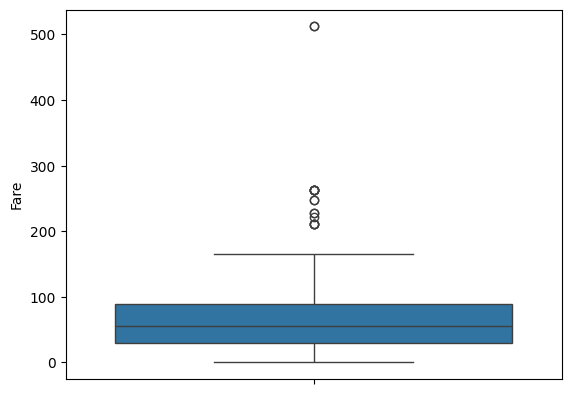

In [ ]:
sns.boxplot(df['Fare'])

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Example: Removing outliers from the 'Fare' column
data_no_outliers = remove_outliers_iqr(df, 'Fare')

<Axes: ylabel='Fare'>

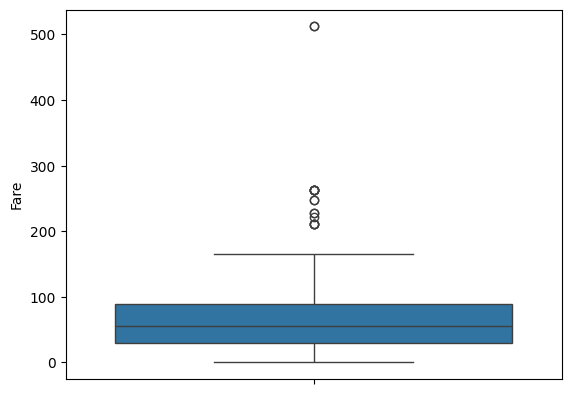

In [ ]:
sns.boxplot(df['Fare'])


# Scaling and Normalization

# Encoding Categorical Variables

In [ ]:
# One-hot encoding for 'Embarked' and 'Sex' (1 line)
df = pd.get_dummies(df, columns=['Embarked', 'Sex'])

The line of code provided performs one-hot encoding for the 'Embarked' and 'Sex' columns in the DataFrame `df` using pandas' `get_dummies()` function. Here's a detailed explanation:

### One-Hot Encoding
One-hot encoding is a process of converting categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction. This encoding method creates new binary (0 or 1) columns for each unique category in the original categorical column.

### Code Breakdown
```python
# One-hot encoding for 'Embarked' and 'Sex' (1 line)
df = pd.get_dummies(df, columns=['Embarked', 'Sex'])
```

- **`pd.get_dummies()`**: This is a pandas function used to perform one-hot encoding on specified categorical columns.

- **`df`**: This is your DataFrame containing the data.

- **`columns=['Embarked', 'Sex']`**: This parameter specifies the columns in the DataFrame that should be one-hot encoded. In this case, it includes 'Embarked' and 'Sex'.

### What Happens:
1. **New Columns Created**: For each unique category in the 'Embarked' and 'Sex' columns, `pd.get_dummies()` creates a new column. For example, if 'Embarked' has unique values like 'C', 'Q', 'S', and 'Sex' has 'male', 'female', new columns named 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', and 'Sex_male' will be created.

2. **Binary Encoding**: The values in these new columns will be binary (0 or 1). A value of 1 indicates the presence of that category in the original column, and 0 indicates its absence. For instance, if a row originally had 'Sex' as 'male', the new 'Sex_male' column will have a 1, and 'Sex_female' will have a 0.

3. **Original Columns Dropped**: The original 'Embarked' and 'Sex' columns are removed from the DataFrame, as they have been replaced by the new one-hot encoded columns.

4. **Assignment Back to `df`**: The resulting DataFrame, with the one-hot encoded columns, is assigned back to `df`. This effectively updates `df` with the new structure, where categorical columns 'Embarked' and 'Sex' are now represented as multiple binary columns.

This process is particularly useful in machine learning workflows where models often require numerical input, and categorical data needs to be converted into a numerical format without implying any ordinal relationship between the categories.

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.468892,1,0,PC 17599,-0.065466,C85,True,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.430956,1,0,113803,-0.310494,C123,False,False,True,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",0.671219,0,0,17463,-0.327170,E46,False,False,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0.038948,1,1,PP 9549,-0.800999,G6,False,False,True,True,False
11,12,1,1,"Bonnell, Miss. Elizabeth",0.721801,0,0,113783,-0.668266,C103,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0.582701,1,1,11751,-0.317849,D35,False,False,True,True,False
872,873,0,1,"Carlsson, Mr. Frans Olof",0.405665,0,0,695,-0.958662,B51 B53 B55,False,False,True,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0.696510,0,1,11767,0.094554,C50,True,False,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",0.228629,0,0,112053,-0.621776,B42,False,False,True,True,False


In [ ]:

X = df.select_dtypes(include=['number'])


min = 0
max = 1

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min


df[X.columns] = X_scaled
